## Problem Statement

Given Temperature and Precipitation at 9 stations and river flow at one location, predict river flow one week later.

*Predictors/Features*:  Temperature (${^o}C$) and Precipitation (mm) at 9 stations; river flow ($m^{3}s^{-1}$) at given location.

*Predictand/Target*: River Flow ($m^{3}s^{-1}$) at the same location one week later

## Science Background

*Why would we expect to be able to predict river flow with precipitation, temperature, and the previous river flow? How are these variables related?*


* In the absence of new water input, the river flow will decrease slowly over time. 
* River flow has high autocorrelation over some timescale (??)
* Increased precipitation -> increased river flow
* River flow is an "integrated" response in time to precipation
* In regions with snow, temperature above freezing leads to melting snow and increased river flow during the melt season
* In the non-melt season, higher temperatures could leader to more evaportation and result in less river flow, but this is likely a small impact 
* All datasets could have a climate change related trend or changes in variability over time
* All have a seasonal cycle

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data_path='/Users/kpegion/projects/climateai/riverflow/data/'
file='climateai_coding_challenge_data_v2.nc'

## Read Data

In [3]:
ds=xr.open_dataset(data_path+file)

### Quick Check that Data looks reasonable

In [4]:
ds

<xarray.Dataset>
Dimensions:         (station_number: 9, time_flow: 21542, time_weather: 21546)
Coordinates:
  * time_flow       (time_flow) datetime64[ns] 1958-01-04 ... 2016-12-26
  * time_weather    (time_weather) datetime64[ns] 1957-01-01 ... 2015-12-31
  * station_number  (station_number) int64 0 1 2 3 4 5 6 7 8
    lat             float64 ...
    lon             float64 ...
Data variables:
    flow            (time_flow) float64 ...
    temperature     (time_weather, station_number) float64 ...
    precipitation   (time_weather, station_number) float64 ...

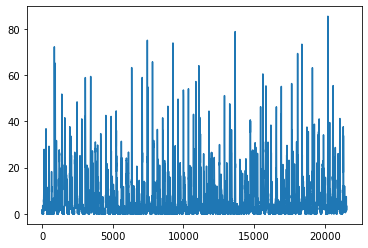

In [5]:
plt.plot(ds['flow'])

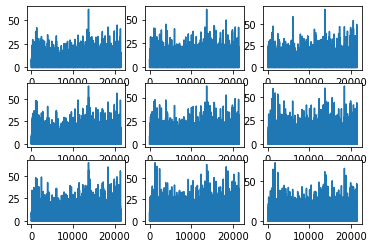

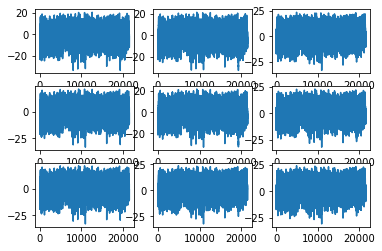

In [6]:
ncols=3
nrows=3

fig = plt.figure()
for i,station in enumerate(ds['station_number']):
    plt.subplot(nrows,ncols,i+1)
    plt.plot(ds['precipitation'].sel(station_number=station))
    
fig = plt.figure()
for i,station in enumerate(ds['station_number']):
    plt.subplot(nrows,ncols,i+1)
    plt.plot(ds['temperature'].sel(station_number=station))

### Clean up times

In [ ]:
ds=ds.where(ds['time_flow']==ds['time_weather'])
ds

## Define Features and Targets 
Features (`X`): precipitation, temperature, flow 
Target (`Y`): flow one week later

In [ ]:
# Align matching times for flow, p, and T
ds_X=xr.merge([ds['precipitation',ds['temperature'],ds['flow']])
   
# Extract the flow times from 1-week later
dates_week=ds['time_flow'].values+pd.Timedelta(days=7)
Y=ds['flow'].sel(time_flow=dates_week)

### Split Data into Training and Test

In [ ]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y)